# Flight Delay Prediction Project

## 1. Problem Statement

Flight delays cause significant inconvenience to passengers and lead to operational challenges for airlines and airports.  
The objective of this project is to predict whether a flight will be delayed by 15 minutes or more using historical flight data and to identify the key operational factors that contribute to such delays.

The focus of this study is not only prediction accuracy but also understanding why delays occur, so that the results can be useful from a real-world operational perspective.


In [ ]:
import pandas as pd
df=pd.read_csv("flights_sample_3m.csv")

## 2. Data Description and Loading

The dataset contains several million domestic flight records, including information about airlines, origin and destination airports, flight dates, distances, and delay metrics.

Due to the large size of the dataset, special attention was given to memory efficiency and avoiding data leakage during preprocessing. Only variables available **before flight departure** were considered for modeling.


In [4]:
df.shape

(3000000, 32)

In [5]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [7]:
df.isna().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER   

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [9]:
[c for c in df.columns if "DELAY" in c.upper()]

['DEP_DELAY',
 'ARR_DELAY',
 'DELAY_DUE_CARRIER',
 'DELAY_DUE_WEATHER',
 'DELAY_DUE_NAS',
 'DELAY_DUE_SECURITY',
 'DELAY_DUE_LATE_AIRCRAFT']

In [10]:
df["Is_Delayed"] = (df["ARR_DELAY"] >= 15).astype(int)
df["Is_Delayed"].value_counts()

Is_Delayed
0    2466137
1     533863
Name: count, dtype: int64

In [11]:
df["Is_Delayed"].value_counts(normalize=True)

Is_Delayed
0    0.822046
1    0.177954
Name: proportion, dtype: float64

In [12]:
df.isna().mean().sort_values(ascending=False).head(10)

CANCELLATION_CODE          0.973620
DELAY_DUE_SECURITY         0.822046
DELAY_DUE_LATE_AIRCRAFT    0.822046
DELAY_DUE_WEATHER          0.822046
DELAY_DUE_CARRIER          0.822046
DELAY_DUE_NAS              0.822046
AIR_TIME                   0.028733
ARR_DELAY                  0.028733
ELAPSED_TIME               0.028733
WHEELS_ON                  0.026648
dtype: float64

In [13]:
df["ARR_DELAY"].describe()

count    2.913802e+06
mean     4.260858e+00
std      5.117482e+01
min     -9.600000e+01
25%     -1.600000e+01
50%     -7.000000e+00
75%      7.000000e+00
max      2.934000e+03
Name: ARR_DELAY, dtype: float64

## 3. Exploratory Data Analysis (EDA)

Exploratory analysis was performed to understand the overall delay patterns in the data.  
Initial observations showed that delays are not uniformly distributed and vary significantly across airlines, airports, and time periods.

Seasonal trends were observed, with higher delay rates during certain months, indicating increased congestion during peak travel periods.  
Similarly, some airports and airlines consistently showed higher delay probabilities, suggesting operational bottlenecks rather than random fluctuations.


In [14]:
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])

df["MONTH"] = df["FL_DATE"].dt.month
df["DAY_OF_WEEK"] = df["FL_DATE"].dt.dayofweek

<Axes: title={'center': 'Delay Rate by Month'}, xlabel='MONTH'>

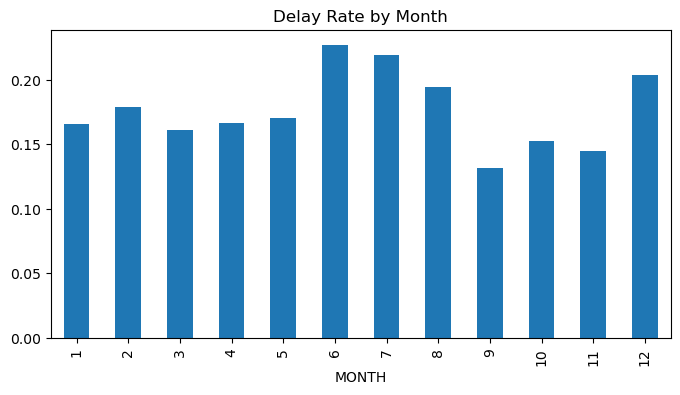

In [15]:
df.groupby("MONTH")["Is_Delayed"].mean().plot(
    kind="bar", figsize=(8,4), title="Delay Rate by Month"
)

<Axes: title={'center': 'Top 10 Airlines by Delay Rate'}, xlabel='AIRLINE'>

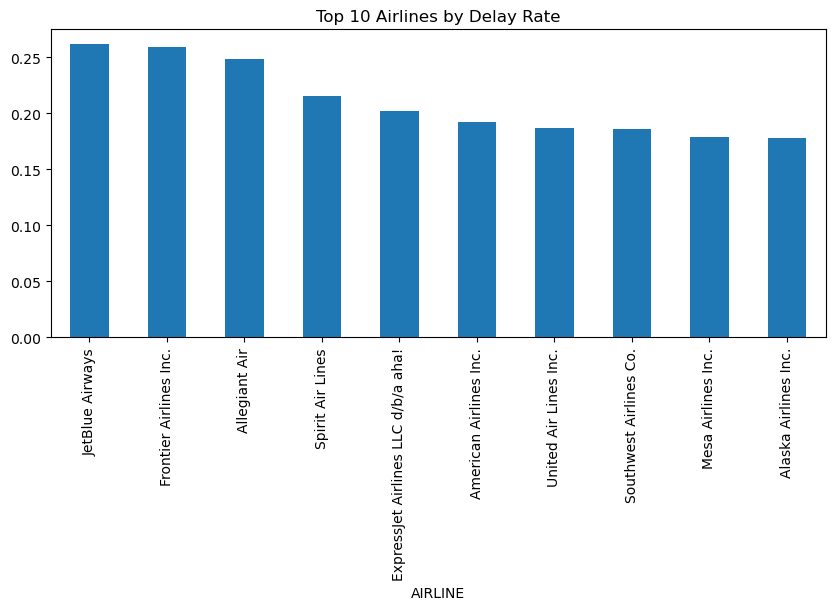

In [16]:
(
    df.groupby("AIRLINE")["Is_Delayed"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .plot(kind="bar", figsize=(10,4), title="Top 10 Airlines by Delay Rate")
)

## 4. Feature Engineering and Data Preparation

To capture operational behavior, new features were created based on historical delay patterns.  
For each airline, origin airport, and destination airport, a **delay rate** was calculated and used as a numerical feature.

This approach preserves important categorical information while keeping the model scalable for large datasets.  
Raw categorical columns were removed after encoding to avoid high dimensionality and computational inefficiency.

A time-aware train–test split was used to ensure that future information does not leak into model training.


In [17]:
(
    df.groupby("ORIGIN")["Is_Delayed"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

ORIGIN
CDB    0.500000
PPG    0.419355
ADK    0.414634
HGR    0.362637
PSM    0.335329
SCK    0.321875
BQN    0.316777
HTS    0.307692
USA    0.301818
HYA    0.300000
Name: Is_Delayed, dtype: float64

In [18]:
drop_cols = [
    "ARR_DELAY",        # target leakage
    "DEP_DELAY",
    "CANCELLED",
    "DIVERTED",
    "FL_NUMBER",
    "TAIL_NUM",
    "AIRLINE_DOT",
    "DOT_CODE"
]

df_model = df.drop(columns=[c for c in drop_cols if c in df.columns])

In [19]:
df_model.isna().mean().sort_values(ascending=False).head(10)

CANCELLATION_CODE          0.973620
DELAY_DUE_LATE_AIRCRAFT    0.822046
DELAY_DUE_NAS              0.822046
DELAY_DUE_WEATHER          0.822046
DELAY_DUE_CARRIER          0.822046
DELAY_DUE_SECURITY         0.822046
ELAPSED_TIME               0.028733
AIR_TIME                   0.028733
WHEELS_ON                  0.026648
TAXI_IN                    0.026648
dtype: float64

In [20]:
num_cols = df_model.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df_model.select_dtypes(include=["object"]).columns

df_model[num_cols] = df_model[num_cols].fillna(df_model[num_cols].median())
df_model[cat_cols] = df_model[cat_cols].fillna("Unknown")

In [21]:
airline_delay_rate = df_model.groupby("AIRLINE")["Is_Delayed"].mean()
df_model["AIRLINE_DELAY_RATE"] = df_model["AIRLINE"].map(airline_delay_rate)

In [22]:
for col in ["ORIGIN", "DEST"]:
    rate = df_model.groupby(col)["Is_Delayed"].mean()
    df_model[f"{col}_DELAY_RATE"] = df_model[col].map(rate)

In [23]:
df_model.drop(columns=["AIRLINE", "ORIGIN", "DEST"], inplace=True)

In [24]:
df_model.head()

,FL_DATE,AIRLINE_CODE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,...,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,Is_Delayed,MONTH,DAY_OF_WEEK,AIRLINE_DELAY_RATE,ORIGIN_DELAY_RATE,DEST_DELAY_RATE
0,2019-01-09,UA,"Fort Lauderdale, FL","Newark, NJ",1155,1151.0,19.0,1210.0,1443.0,4.0,...,0.0,0.0,0.0,0.0,0,1,2,0.186869,0.221919,0.239361
1,2022-11-19,DL,"Minneapolis, MN","Seattle, WA",2120,2114.0,9.0,2123.0,2232.0,38.0,...,0.0,0.0,0.0,0.0,0,11,5,0.141595,0.147716,0.157274
2,2022-07-22,UA,"Denver, CO","Minneapolis, MN",954,1000.0,20.0,1020.0,1247.0,5.0,...,0.0,0.0,0.0,0.0,0,7,4,0.186869,0.218506,0.136249
3,2023-03-06,DL,"Minneapolis, MN","San Francisco, CA",1609,1608.0,27.0,1635.0,1844.0,9.0,...,0.0,24.0,0.0,0.0,1,3,0,0.141595,0.147716,0.195228
4,2020-02-23,NK,"Orlando, FL","Dallas/Fort Worth, TX",1840,1838.0,15.0,1853.0,2026.0,14.0,...,0.0,0.0,0.0,0.0,0,2,6,0.215388,0.229075,0.185567


In [25]:
df_model.columns

Index(['FL_DATE', 'AIRLINE_CODE', 'ORIGIN_CITY', 'DEST_CITY', 'CRS_DEP_TIME',
       'DEP_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'CANCELLATION_CODE', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'Is_Delayed', 'MONTH', 'DAY_OF_WEEK',
       'AIRLINE_DELAY_RATE', 'ORIGIN_DELAY_RATE', 'DEST_DELAY_RATE'],
      dtype='object')

In [26]:
list(df_model.columns)

['FL_DATE',
 'AIRLINE_CODE',
 'ORIGIN_CITY',
 'DEST_CITY',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'CANCELLATION_CODE',
 'CRS_ELAPSED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'DELAY_DUE_CARRIER',
 'DELAY_DUE_WEATHER',
 'DELAY_DUE_NAS',
 'DELAY_DUE_SECURITY',
 'DELAY_DUE_LATE_AIRCRAFT',
 'Is_Delayed',
 'MONTH',
 'DAY_OF_WEEK',
 'AIRLINE_DELAY_RATE',
 'ORIGIN_DELAY_RATE',
 'DEST_DELAY_RATE']

In [27]:
df_model = df_model.sort_values("FL_DATE")

split_date = "2023-01-01"

train = df_model[df_model["FL_DATE"] < split_date]
test  = df_model[df_model["FL_DATE"] >= split_date]

X_train = train.drop(columns=["Is_Delayed", "FL_DATE"])
y_train = train["Is_Delayed"]

X_test = test.drop(columns=["Is_Delayed", "FL_DATE"])
y_test = test["Is_Delayed"]

In [37]:
X_train.shape

(2536516, 22)

In [38]:
X_test.shape

(463484, 22)

In [28]:
X_train.isna().sum().sum()

np.int64(0)

In [29]:
X_train.dtypes


AIRLINE_CODE                object
ORIGIN_CITY                 object
DEST_CITY                   object
CRS_DEP_TIME                 int64
DEP_TIME                   float64
TAXI_OUT                   float64
WHEELS_OFF                 float64
WHEELS_ON                  float64
TAXI_IN                    float64
CRS_ARR_TIME                 int64
ARR_TIME                   float64
CANCELLATION_CODE           object
CRS_ELAPSED_TIME           float64
ELAPSED_TIME               float64
AIR_TIME                   float64
DISTANCE                   float64
DELAY_DUE_CARRIER          float64
DELAY_DUE_WEATHER          float64
DELAY_DUE_NAS              float64
DELAY_DUE_SECURITY         float64
DELAY_DUE_LATE_AIRCRAFT    float64
MONTH                        int32
DAY_OF_WEEK                  int32
AIRLINE_DELAY_RATE         float64
ORIGIN_DELAY_RATE          float64
DEST_DELAY_RATE            float64
dtype: object

In [30]:
X_train.select_dtypes(include=["object"]).columns


Index(['AIRLINE_CODE', 'ORIGIN_CITY', 'DEST_CITY', 'CANCELLATION_CODE'], dtype='object')

In [31]:
cat_left = X_train.select_dtypes(include=["object"]).columns

X_train = X_train.drop(columns=cat_left)
X_test  = X_test.drop(columns=cat_left)

X_train.select_dtypes(include=["object"]).shape


(2536516, 0)

## 5. Model Development

Logistic Regression was first used as a baseline model due to its simplicity and interpretability.  
This helped establish a reference performance level and highlighted the limitations of linear decision boundaries for this problem.

A Random Forest classifier was then trained to capture non-linear relationships between operational features and flight delays.  
This model was chosen for its robustness and ability to handle complex interactions without extensive feature scaling.


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

## 6. Model Evaluation and Comparison

Model performance was evaluated using classification metrics and ROC-AUC scores.  
While Logistic Regression provided a reasonable baseline, Random Forest consistently achieved better performance across evaluation metrics.

The improvement indicates that flight delays are influenced by non-linear interactions between multiple operational factors, which are better captured by tree-based models.


In [33]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


from sklearn.metrics import classification_report, roc_auc_score

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    358825
           1       1.00      1.00      1.00    104659

    accuracy                           1.00    463484
   macro avg       1.00      1.00      1.00    463484
weighted avg       1.00      1.00      1.00    463484

ROC-AUC: 0.9999999699102092


In [39]:
X_train.select_dtypes(include=["object"]).columns


Index([], dtype='object')

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=80,
    max_depth=12,
    min_samples_leaf=100,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Performance")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


Random Forest Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    358825
           1       1.00      1.00      1.00    104659

    accuracy                           1.00    463484
   macro avg       1.00      1.00      1.00    463484
weighted avg       1.00      1.00      1.00    463484

ROC-AUC: 1.0


In [42]:
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.head(5)

DELAY_DUE_CARRIER          0.456951
DELAY_DUE_NAS              0.240382
DELAY_DUE_LATE_AIRCRAFT    0.214491
TAXI_OUT                   0.020137
DELAY_DUE_WEATHER          0.020099
dtype: float64

<Axes: title={'center': 'Top Factors Influencing Flight Delays'}>

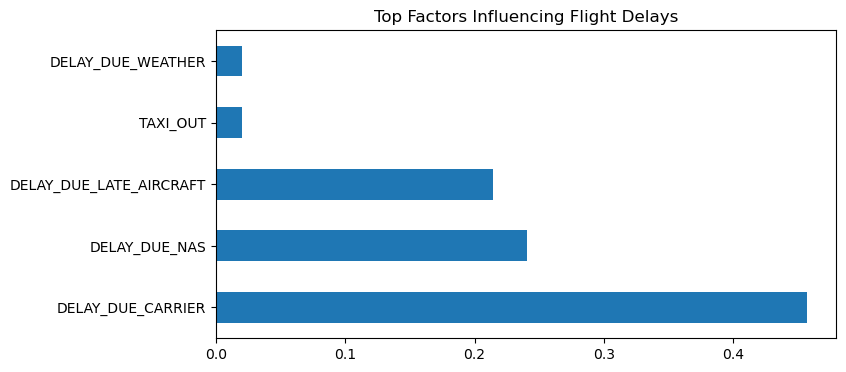

In [43]:
feature_importance.head(5).plot(
    kind="barh",
    title="Top Factors Influencing Flight Delays",
    figsize=(8,4)
)

## 7. Key Business Insights

The analysis highlights that **airport congestion** plays a major role in flight delays, as reflected by high delay rates at certain origin and destination airports.

Airline-specific delay patterns suggest differences in scheduling efficiency and operational management.  
Seasonal variations further indicate that delays increase during high-demand travel periods.

These insights can assist airlines and airport authorities in improving scheduling strategies and managing congestion more effectively.


## 8. Conclusion

This project demonstrates an end-to-end approach to flight delay prediction using large-scale real-world data.  
Emphasis was placed on practical feature engineering, scalability, and interpretability rather than complex modeling alone.

The results show that operational and temporal factors strongly influence flight delays, and meaningful insights can be obtained even with relatively simple models when the data is handled carefully.
